In [2]:
# from llm_trainer import create_dataset

# create_dataset(save_dir="data",
#                dataset="fineweb-edu-10B",
#                chunks_limit=1500,
#                chunk_size=int(1e6))

In [1]:
import random
import torch
from omegaconf import OmegaConf
from dacite import from_dict
from dacite import Config as DaciteConfig
from xlstm import xLSTMLMModel, xLSTMLMModelConfig
import numpy as np


def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

set_seed(42)

# Create a model
cfg = OmegaConf.load("xlstm_config.yaml")
cfg = from_dict(data_class=xLSTMLMModelConfig, data=OmegaConf.to_container(cfg), config=DaciteConfig(strict=True))
xLSTM = xLSTMLMModel(cfg)

{'verbose': True, 'with_cuda': True, 'extra_ldflags': ['-L/home/nick/anaconda3/envs/xlstm/lib', '-lcublas'], 'extra_cflags': ['-DSLSTM_HIDDEN_SIZE=768', '-DSLSTM_BATCH_SIZE=8', '-DSLSTM_NUM_HEADS=4', '-DSLSTM_NUM_STATES=4', '-DSLSTM_DTYPE_B=float', '-DSLSTM_DTYPE_R=__nv_bfloat16', '-DSLSTM_DTYPE_W=__nv_bfloat16', '-DSLSTM_DTYPE_G=__nv_bfloat16', '-DSLSTM_DTYPE_S=__nv_bfloat16', '-DSLSTM_DTYPE_A=float', '-DSLSTM_NUM_GATES=4', '-DSLSTM_SIMPLE_AGG=true', '-DSLSTM_GRADIENT_RECURRENT_CLIPVAL_VALID=false', '-DSLSTM_GRADIENT_RECURRENT_CLIPVAL=0.0', '-DSLSTM_FORWARD_CLIPVAL_VALID=false', '-DSLSTM_FORWARD_CLIPVAL=0.0', '-U__CUDA_NO_HALF_OPERATORS__', '-U__CUDA_NO_HALF_CONVERSIONS__', '-U__CUDA_NO_BFLOAT16_OPERATORS__', '-U__CUDA_NO_BFLOAT16_CONVERSIONS__', '-U__CUDA_NO_BFLOAT162_OPERATORS__', '-U__CUDA_NO_BFLOAT162_CONVERSIONS__', '-isystem', '/home/nick/anaconda3/envs/xlstm/targets/x86_64-linux/include'], 'extra_cuda_cflags': ['-Xptxas="-v"', '-gencode', 'arch=compute_80,code=compute_80', '-re

Using /home/nick/.cache/torch_extensions/py311_cu126 as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file /home/nick/.cache/torch_extensions/py311_cu126/slstm_HS768BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0/build.ninja...
/home/nick/anaconda3/envs/xlstm/lib/python3.11/site-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Building extension module slstm_HS768BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
Loading extension module slstm_HS768BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0...


ninja: no work to do.


/home/nick/anaconda3/envs/xlstm/lib/python3.11/site-packages/xlstm/blocks/slstm/cell.py:543: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @conditional_decorator(
/home/nick/anaconda3/envs/xlstm/lib/python3.11/site-packages/xlstm/blocks/slstm/cell.py:568: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  @conditional_decorator(


{'verbose': True, 'with_cuda': True, 'extra_ldflags': ['-L/home/nick/anaconda3/envs/xlstm/lib', '-lcublas'], 'extra_cflags': ['-DSLSTM_HIDDEN_SIZE=768', '-DSLSTM_BATCH_SIZE=8', '-DSLSTM_NUM_HEADS=4', '-DSLSTM_NUM_STATES=4', '-DSLSTM_DTYPE_B=float', '-DSLSTM_DTYPE_R=__nv_bfloat16', '-DSLSTM_DTYPE_W=__nv_bfloat16', '-DSLSTM_DTYPE_G=__nv_bfloat16', '-DSLSTM_DTYPE_S=__nv_bfloat16', '-DSLSTM_DTYPE_A=float', '-DSLSTM_NUM_GATES=4', '-DSLSTM_SIMPLE_AGG=true', '-DSLSTM_GRADIENT_RECURRENT_CLIPVAL_VALID=false', '-DSLSTM_GRADIENT_RECURRENT_CLIPVAL=0.0', '-DSLSTM_FORWARD_CLIPVAL_VALID=false', '-DSLSTM_FORWARD_CLIPVAL=0.0', '-U__CUDA_NO_HALF_OPERATORS__', '-U__CUDA_NO_HALF_CONVERSIONS__', '-U__CUDA_NO_BFLOAT16_OPERATORS__', '-U__CUDA_NO_BFLOAT16_CONVERSIONS__', '-U__CUDA_NO_BFLOAT162_OPERATORS__', '-U__CUDA_NO_BFLOAT162_CONVERSIONS__', '-isystem', '/home/nick/anaconda3/envs/xlstm/targets/x86_64-linux/include'], 'extra_cuda_cflags': ['-Xptxas="-v"', '-gencode', 'arch=compute_80,code=compute_80', '-re

Using /home/nick/.cache/torch_extensions/py311_cu126 as PyTorch extensions root...
No modifications detected for re-loaded extension module slstm_HS768BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0, skipping build step...
Loading extension module slstm_HS768BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0...


In [2]:
# Print the size of the model (a number of parameters it has) in millions
num_params = sum(p.numel() for p in xLSTM.parameters() if p.requires_grad)
print(f"Total Parameters: {num_params / 1e6:.2f}M")

Total Parameters: 125.06M


In [3]:
from llm_trainer import LLMTrainer

# Train the model
trainer = LLMTrainer(model=xLSTM, model_returns_logits=True)
trainer.train(max_steps=4000,
              save_each_n_steps=500,
              BATCH_SIZE=512,
              MINI_BATCH_SIZE=8,
              context_window=256,
              )

Training on: cuda


W0417 19:27:15.348000 1655 site-packages/torch/_inductor/utils.py:1137] [2/0] Not enough SMs to use max_autotune_gemm mode


step: 0 | Loss: 11.562500 | norm: 3.3632 | lr: 2.000000e-05 | dt: 45.50s | tok/sec: 2880.93
step: 1 | Loss: 10.812500 | norm: 3.2310 | lr: 2.666667e-05 | dt: 12.50s | tok/sec: 10489.92
step: 2 | Loss: 10.812500 | norm: 3.1248 | lr: 3.333333e-05 | dt: 13.31s | tok/sec: 9847.26
step: 3 | Loss: 10.750000 | norm: 2.9155 | lr: 4.000000e-05 | dt: 14.38s | tok/sec: 9111.80
step: 4 | Loss: 10.500000 | norm: 2.7111 | lr: 4.666667e-05 | dt: 12.09s | tok/sec: 10837.06
step: 5 | Loss: 10.500000 | norm: 2.4570 | lr: 5.333333e-05 | dt: 14.31s | tok/sec: 9157.68
step: 6 | Loss: 10.437500 | norm: 2.4129 | lr: 6.000000e-05 | dt: 12.32s | tok/sec: 10640.40
step: 7 | Loss: 9.875000 | norm: 2.3875 | lr: 6.666667e-05 | dt: 12.39s | tok/sec: 10582.48
step: 8 | Loss: 9.625000 | norm: 2.4304 | lr: 7.333333e-05 | dt: 14.67s | tok/sec: 8937.11
step: 9 | Loss: 9.500000 | norm: 2.3779 | lr: 8.000000e-05 | dt: 12.05s | tok/sec: 10881.47
step: 10 | Loss: 9.500000 | norm: 2.2951 | lr: 8.666667e-05 | dt: 14.34s | tok

Time elapsed: 834m

Trained on `BATCH_SIZE` * `CONTEXT_WINDOW` * `N_STEP` = 512 * 256 * 4000 = 524,288,000 ~ **524M** Tokens

# Evaluation

In [4]:
from transformers import AutoTokenizer
from llm_trainer import Evaluator

evaluator = Evaluator()
evaluator.eval_all(model=xLSTM,
                   tokenizer=AutoTokenizer.from_pretrained("gpt2"),
                   return_logits=True,
                   max_length=256,
                   stride=128)


Evaluation Summary:
╒══════════════╤════════════╤══════════╕
│ Benchmark    │ Metric     │    Value │
╞══════════════╪════════════╪══════════╡
│ HellaSwag    │ Accuracy   │   0.2739 │
├──────────────┼────────────┼──────────┤
│ LAMBADA      │ Perplexity │ 109.31   │
├──────────────┼────────────┼──────────┤
│ WikiText-103 │ Perplexity │  72.6    │
├──────────────┼────────────┼──────────┤
│ WikiText-2   │ Perplexity │  72.6    │
├──────────────┼────────────┼──────────┤
│ PTB          │ Perplexity │  95.31   │
╘══════════════╧════════════╧══════════╛


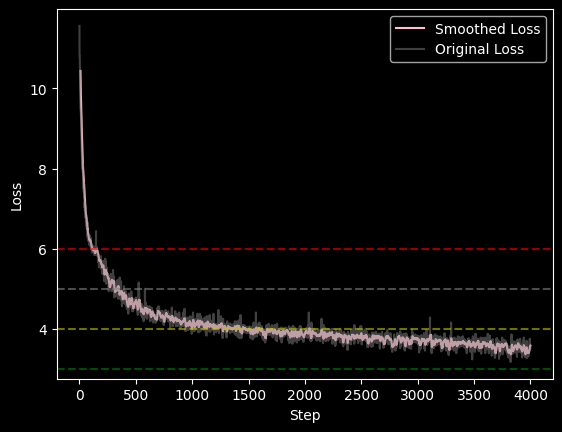

In [5]:
trainer.plot_loss()